# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

# Data Downloading

In [1]:
!pip install gdown

In [2]:
import gdown

# Download zip from Google Drive
url = 'https://drive.google.com/uc?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw'
zipname = 'A1_data.zip'
gdown.download(url, zipname, quiet=False)

# Unzip files
from zipfile import ZipFile

data_folder = "data"
with ZipFile(zipname, 'r') as zf:
    zf.extractall(path=data_folder)

Downloading...
From: https://drive.google.com/uc?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw
To: /content/A1_data.zip
100%|██████████| 15.6k/15.6k [00:00<00:00, 14.1MB/s]


In [3]:
# Load texts from all tweets
data_files = []

for i in range(1, 6):
    with open(data_folder+"/file2") as f:
        s = f.read().split("\n")
        if s[-1] == "":
            s = s[:-1]
        data_files.append(s)


In [ ]:
print(data_files)

[['Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com', 'Its american tradition bitch', "@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones", '" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I\'m happy, I tweet because I\'m free"" LOL!"', "Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m", "@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.", 'iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki', 'RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!', "RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI", 'Hey doll! Great I missed True Blo

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

In [ ]:
for i in range(15):
    print(str(i+1)+". Input tweet")
    print(data_files[1][i])
    print(str(i+1)+". Tokenized tweet")
    print(data_files[1][i])
    print()

    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com


    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its , american , tradition , bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet ?? I'm , ...
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , . , . , . , Then , louder , ones


    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "


    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m


    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .


    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone , activation , delays , continue , , , Apple , offers , $ , 30 , http://twt.gs/l3Ki


    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25 , MB , http://bit.ly/62mjw , Nice , ! , ! , !


    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client Burger King's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , Burger , King , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI


    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)


    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland


    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both


    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming , : ,  Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv


    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T , - , Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , . , . , . , Best , vreemd , eigenlijk
    


## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_md

In [74]:
from typing import List
import spacy
import re
from collections import defaultdict
import string

class BPETokenizer:
    def __init__(self, vocab_size: int, lowercase=False) -> None:
        """
        :param vocab_size: int.
            If vocab size is less than unique symbols in the data,
            vocab will be a list of all this symbols
            (bigger than the given one, because this is an initial step)
        :param lowercase: boolean. Whether to lowercase the text
        """
        self.vocab_size = vocab_size
        # </w> - a special token, end of word
        self.vocab = set(["</w>"])
        self.merges = {}
        self.split_frequency = defaultdict(int)
        # Does uppercase is different letters
        self.lowercase = lowercase
        self.nlp = spacy.load("en_core_web_md")

    def preprocess_text(self, text):
        """
        Reformat text to a list of words
        Words and numbers basically are separated from punctuation
        Based on spacy
        :param text: input text
        :return: list of words
        """
        if self.lowercase:
            text = text.lower()

        # Change free space to one whitespace
        text = re.sub(r"\s+", " ", text).strip()
        # Split words, numbers and punctuations
        res = [w.text for w in self.nlp(text)]
        return res

    def words_to_frequency(self, words):
        """
        Update the dictionary that counts words
        It is assumed that all dataset will be given in one time
        :param words: list of words
        """
        for word in words:
            # The end of word added to the end of each word
            self.split_frequency[" ".join(list(word)+["</w>"])] += 1

    def add_text(self, text):
        """
        Prepare given text to the training
        :param text: input text
        """
        if self.lowercase:
            # Lowercase the text if needed
            text = text.lower()
        # Split word into "w o r d </w>" and count
        self.words_to_frequency(self.preprocess_text(text))
        # Sure that all symbols are in the vocabulary
        self.vocab.update(list(text))

    def count_pairs(self):
        """
        Looks through splits and count thier frequency in the corpus
        :return: dictionary {(subword_1, subword_2): frequency}
        """
        counter = defaultdict(int)
        for word in self.split_frequency:
            # Extract subtokens (they are present in vocab)
            subwords = word.split(" ")
            if len(subwords) == 1:
                # This word is in vocab
                continue

            # Add possible merges
            for ind in range(len(subwords)-1):
                counter[(subwords[ind], subwords[ind+1])] += self.split_frequency[word]
        return counter

    def update_split_frequency_by_merge(self, best_pair):
        """
        Update splits frequency keys by merging pairs that forms best pair
        :param best_pair: pair with this values and order will be merged together
        """
        # Obtain keys from split frequency
        words = list(self.split_frequency.keys())
        p = re.compile(r'(?<!\S)' + re.escape(best_pair[0] + ' ' + best_pair[1]) + r'(?!\S)')
        for word in words:
            # Join all pairs from the keys of split frequency
            new_word = p.sub(''.join(best_pair), word)
            if len(new_word) < len(word):
                self.split_frequency[new_word] = self.split_frequency.pop(word)


    def train(self, corpus: List[str]) -> None:
        """
        Training function
        Add text and start training
        """
        # Prepare split frequency and vocab
        for text in corpus:
            self.add_text(text)
        return self.train_loop()

    def train_loop(self):
        """
        Run train operation.
        Till fulleness of the vocabulary,
        find the most frequent pair and merge it
        :return: list of performed merges in order of steps done,
                 and vocabulary (list of tokens)
        """
        while len(self.vocab) < self.vocab_size:
            # Obtain the next merge
            pairs_counter = self.count_pairs()
            # May be no possible merges
            if len(pairs_counter) == 0:
                break

            # Extract pair with the highest frequency
            best_pair = max(pairs_counter, key=pairs_counter.get)

            # Update merges and vocab
            self.merges[best_pair] = best_pair[0] + best_pair[1]
            self.vocab.add(best_pair[0] + best_pair[1])
            # Update split frequency
            self.update_split_frequency_by_merge(best_pair)

        return self.merges, self.vocab


    def tokenize(self, text: str) -> List[str]:
        """
        Process an input text to a sequence of tokens
        :param text: input text
        :return: list of tokens
        """
        # Prepare text in a requiered format "w o r d </w>"
        if self.lowercase:
            # Lowercase the text
            text = text.lower()

        # Process input string
        # By merging it using performed merges during training
        words = " ".join([" ".join(w) +" </w>" for w in self.preprocess_text(text)])
        for pair in self.merges:
            pattern = re.compile(r'(?<!\S)' + re.escape(pair[0] + ' ' + pair[1]) + r'(?!\S)')
            words = pattern.sub(''.join(pair), words)

        # Split processed string into a list of words
        # And drop end of word symbol
        tokens = []
        word_list = words.split(" ")
        for word in word_list:
            if word == "</w>":
                continue
            elif word[-4:] == "</w>":
                word = word[:-4]
            tokens.append(word)
        return tokens


In [43]:
# Test the implementation
# Easy example
corpus = ['low low, low low low lowest lowest newer newer newer' , 'newer newer newer wider wider wider new new']

bpe = BPETokenizer(21)
merges, vocab = bpe.train(corpus)
print("Merges", merges)
print("Vocab length", len(vocab))
print("\nTokenization result")
tokens = bpe.tokenize("low, new, higher and higher!")
print(tokens)

Merges {('e', 'r'): 'er', ('er', '</w>'): 'er</w>', ('n', 'e'): 'ne', ('ne', 'w'): 'new', ('l', 'o'): 'lo', ('lo', 'w'): 'low', ('new', 'er</w>'): 'newer</w>', ('low', '</w>'): 'low</w>'}
Vocab length 21

Tokenization result
l o w </w> , </w> n e w </w> , </w> h i g h e r </w> a n d </w> h i g h e r </w> ! </w>
low</w> , </w> new </w> , </w> h i g h er</w> a n d </w> h i g h er</w> ! </w>
['low', ',', 'new', ',', 'h', 'i', 'g', 'h', 'er', 'a', 'n', 'd', 'h', 'i', 'g', 'h', 'er', '!']


In [44]:
# Test the implementation with the given data
corpus = []
for i in range(len(data_files)):
    corpus += data_files[i]

bpe = BPETokenizer(10000)
merges, vocab = bpe.train(corpus)
print("Merges", merges)
print("Vocab length", len(vocab))
print("\nInitial tweet")
print(data_files[1][0])
print("Tokenization result")
tokens = bpe.tokenize(data_files[1][0])
print(tokens)

Merges {('e', '</w>'): 'e</w>', ('t', '</w>'): 't</w>', ('i', 'n'): 'in', ('s', '</w>'): 's</w>', ('t', 'h'): 'th', ('y', '</w>'): 'y</w>', ('#', '</w>'): '#</w>', ('e', 'r'): 'er', ('o', 'n'): 'on', ('a', 'n'): 'an', ('d', '</w>'): 'd</w>', ('.', '</w>'): '.</w>', ('e', 'n'): 'en', ('r', 'e'): 're', ('o', '</w>'): 'o</w>', ('s', 'e'): 'se', ('l', 'i'): 'li', ('t', 't'): 'tt', ('s', 't</w>'): 'st</w>', ('o', 'r'): 'or', ('o', 'u'): 'ou', ('i', '</w>'): 'i</w>', ('a', 'r'): 'ar', ('g', '</w>'): 'g</w>', ('"', '</w>'): '"</w>', ('l', 'l'): 'll', ('o', 'm'): 'om', ('c', 'h'): 'ch', ('in', 'g</w>'): 'ing</w>', ('m', 'a'): 'ma', ('k', '</w>'): 'k</w>', ('a', 't</w>'): 'at</w>', ('/', '/'): '//', ('th', 'e</w>'): 'the</w>', ('on', '</w>'): 'on</w>', ('in', '</w>'): 'in</w>', ('er', '</w>'): 'er</w>', ('h', 'tt'): 'htt', ('htt', 'p'): 'http', ('http', ':'): 'http:', ('http:', '//'): 'http://', (':', '</w>'): ':</w>', ('l', 'o'): 'lo', ('t', 'i'): 'ti', ('se', 'm'): 'sem', ('sem', 'st</w>'): '

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [78]:
# Your code here
def analyze_vocab_size(corpus, vocab_sizes):
    """
    Perform training of BPE on different vocab sizes
    and calculate statistics for graphs
    :param corpus: list of texts
    :param vocab_sizes: list of int, sizes of the vocabulary
    """
    # Preparation
    average_lenghts = []
    average_nums = []
    # Load data into the bpe as first iteration
    # If vocab size is less than unique symbols in the data,
    # vocab will be a list of all this symbols
    #  (bigger than the given one, because this is an initial step)
    bpe = BPETokenizer(vocab_sizes[0])
    bpe.train(corpus)


    for vocab_size in vocab_sizes:
        """
        Run algorithm with different sizes of vocabulary.
        I created a bit more optimized algorithm that can train
        after the previous trainings (without new data  provided).
        The first vocab size was analyzed before (during usual train method).
        So no actions will be performed, but statistics will be printed.
        """
        bpe.vocab_size = vocab_size
        merges, vocab = bpe.train_loop()
        print("Vocab size", len(vocab))
        print("Merges", merges)

        # Analyze result of the tokenization
        av_num_tokens = 0
        av_len_tokens = 0
        for s in corpus:
            tokens = bpe.tokenize(s)
            av_num_tokens += len(tokens)
            av_len_tokens += sum([len(t) for t in tokens])

        # Save statistics
        average_lenghts.append(av_len_tokens / av_num_tokens)
        average_nums.append(av_num_tokens / len(corpus))
    return average_lenghts, average_nums

# Set corpus as all data that we have
corpus = []
for i in range(len(data_files)):
    corpus += data_files[i]

# Set vocabulary sizes
# First one is the minimal, to have only initial tokens
vocab_sizes = [10, 250, 500, 750, 1000]

# Run experiments
average_lenghts, average_nums = analyze_vocab_size(corpus, vocab_sizes)
print("Average length of the tokens", average_lenghts)
print("Average number of tokens in the twitter", average_nums)

Vocab size 84
Merges {}
Vocab size 250
Merges {('e', '</w>'): 'e</w>', ('t', '</w>'): 't</w>', ('i', 'n'): 'in', ('s', '</w>'): 's</w>', ('t', 'h'): 'th', ('y', '</w>'): 'y</w>', ('#', '</w>'): '#</w>', ('e', 'r'): 'er', ('o', 'n'): 'on', ('a', 'n'): 'an', ('d', '</w>'): 'd</w>', ('.', '</w>'): '.</w>', ('e', 'n'): 'en', ('o', '</w>'): 'o</w>', ('a', 'r'): 'ar', ('t', 't'): 'tt', ('l', 'i'): 'li', ('o', 'r'): 'or', ('g', '</w>'): 'g</w>', ('"', '</w>'): '"</w>', ('o', 'u'): 'ou', ('r', 'e'): 're', ('T', '</w>'): 'T</w>', ('a', 'l'): 'al', ('o', 'm'): 'om', ('in', 'g</w>'): 'ing</w>', ('c', 'h'): 'ch', ('l', '</w>'): 'l</w>', ('e', 'm'): 'em', ('I', '</w>'): 'I</w>', ('k', '</w>'): 'k</w>', ('/', '/'): '//', ('a', 't</w>'): 'at</w>', ('on', '</w>'): 'on</w>', ('er', '</w>'): 'er</w>', ('h', 'tt'): 'htt', ('htt', 'p'): 'http', ('http', ':'): 'http:', ('http:', '//'): 'http://', ('a', 'm'): 'am', (':', '</w>'): ':</w>', ('e', 'a'): 'ea', ('t', 'i'): 'ti', ('in', '</w>'): 'in</w>', ('S', '

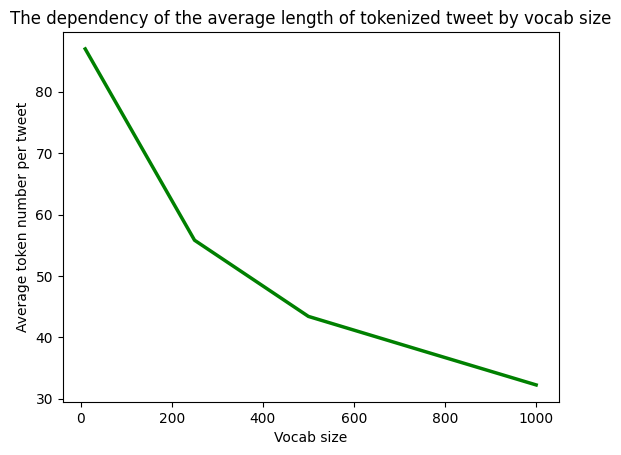

In [79]:
import matplotlib.pyplot as plt

def plot_token_num_vocab_size(vocab_sizes, token_nums):
    """
    Plot the graph on the dependency
    of the average length of tokenized tweet by vocab size.
    :param vocab_sizes: list of ints
    :param token_nums: list of floats, result of analysis
    """
    plt.plot(vocab_sizes, token_nums, color='green', linewidth=2.5)
    plt.xlabel("Vocab size")
    plt.ylabel("Average token number per tweet")
    plt.title("The dependency of the average length of tokenized tweet by vocab size")
    plt.show()

plot_token_num_vocab_size(vocab_sizes, average_nums)

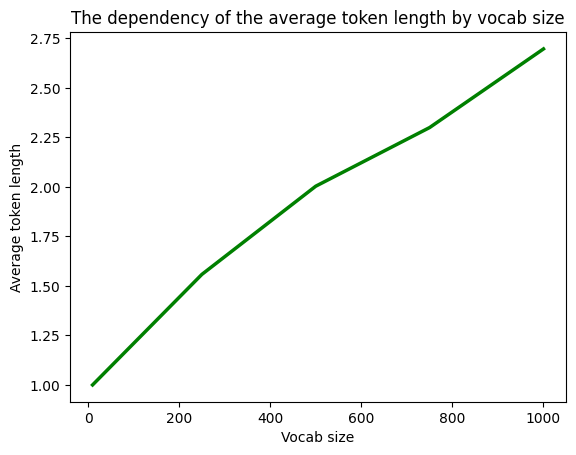

In [80]:
import matplotlib.pyplot as plt

def plot_token_len_vocab_size(vocab_sizes, token_lengths):
    """
    Plot the graph on the dependency
    of the average token length by vocab size.
    :param vocab_sizes: list of ints
    :param token_nums: list of floats, result of analysis
    """
    plt.plot(vocab_sizes, token_lengths, color='green', linewidth=2.5)
    plt.xlabel("Vocab size")
    plt.ylabel("Average token length")
    plt.title("The dependency of the average token length by vocab size")
    plt.show()

plot_token_len_vocab_size(vocab_sizes, average_lenghts)

### Answer:

With increasing the vocabulary size, average token length grows and average number of tokens in the sentence decreases. That's because bigger vocabulary size maens longer sequences of symbols, so tokens became longer while sentence - shorter. The size around 250 is not enough, because tokens are small and unrepresentetive. On the other hand, size of 1000 may be a bit big as words became too exact. Also, the decline of average number of tokens per tweets is not significant. Based on this analysis, one may conclude that the most approptiate size of the vocabulary is around 500-750 tokens, while I'm leaning towards 750.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

In [58]:
!pip install -q opendatasets

not enough values to unpack (expected 3, got 2)


In [59]:
import opendatasets as od
import pandas as pd

# Download dataset from Kaggle
od.download('https://www.kaggle.com/datasets/yutkin/corpus-of-russian-news-articles-from-lenta') # insert ypu kaggle  username and key
# Open dataset from csv file
data = pd.read_csv('/content/corpus-of-russian-news-articles-from-lenta/lenta-ru-news.csv')


100%|██████████| 584M/584M [00:10<00:00, 58.2MB/s]


<ipython-input-59-7e87bd187080>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/corpus-of-russian-news-articles-from-lenta/lenta-ru-news.csv')


In [82]:
# Check the size of dataset
import numpy as np
import os

file_name = "/content/texts.csv"
data.loc[:300, 'text'].to_csv(file_name)

file_stats = os.stat(file_name)
print(f'Size of the data is around {round(file_stats.st_size / (1024 * 1024), 3)} MB')

Size of the data is around 0.792 MB


In [71]:
# Prepare dataset for BPE
corpus_ru = data['text'].values[:300]

In [81]:
# Set vocabulary sizes
# First one is the minimal, to have only initial tokens
vocab_sizes = [10, 250, 500, 750, 1000]

# Run experiments
average_lenghts, average_nums = analyze_vocab_size(corpus_ru, vocab_sizes)
print("Average length of the tokens", average_lenghts)
print("Average number of tokens in the twitter", average_nums)

Vocab size 148
Merges {}
Vocab size 250
Merges {('и', '</w>'): 'и</w>', ('о', '</w>'): 'о</w>', ('с', 'т'): 'ст', ('е', '</w>'): 'е</w>', ('а', '</w>'): 'а</w>', ('е', 'н'): 'ен', (',', '</w>'): ',</w>', ('о', 'в'): 'ов', ('р', 'а'): 'ра', ('я', '</w>'): 'я</w>', ('.', '</w>'): '.</w>', ('й', '</w>'): 'й</w>', ('р', 'е'): 'ре', ('м', '</w>'): 'м</w>', ('а', 'н'): 'ан', ('в', '</w>'): 'в</w>', ('р', 'о'): 'ро', ('к', 'о'): 'ко', ('п', 'о'): 'по', ('н', 'о'): 'но', ('х', '</w>'): 'х</w>', ('"', '</w>'): '"</w>', ('е', 'р'): 'ер', ('е', 'л'): 'ел', ('н', 'ы'): 'ны', ('е', 'т'): 'ет', ('и', 'т'): 'ит', ('н', 'а'): 'на', ('ь', '</w>'): 'ь</w>', ('о', 'б'): 'об', ('о', 'р'): 'ор', ('и', 'н'): 'ин', ('и', 'л'): 'ил', ('ен', 'и'): 'ени', ('ы', '</w>'): 'ы</w>', ('с', 'к'): 'ск', ('а', 'л'): 'ал', ('г', 'о</w>'): 'го</w>', ('о', 'т'): 'от', ('и', 'и</w>'): 'ии</w>', ('а', 'т'): 'ат', ('о', 'д'): 'од', ('у', '</w>'): 'у</w>', ('ов', '</w>'): 'ов</w>', ('в', 'о'): 'во', ('-', '</w>'): '-</w>', ('

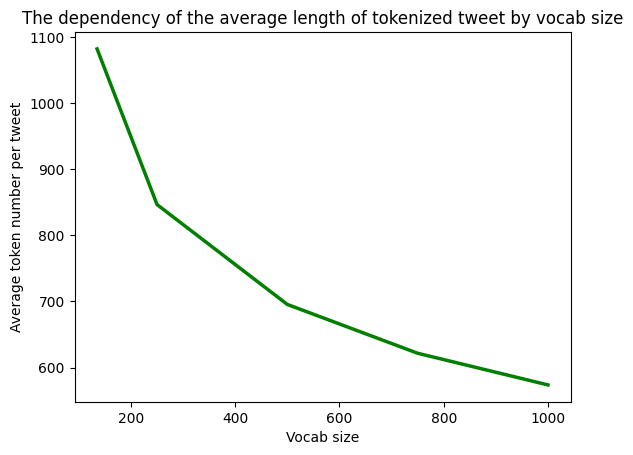

In [75]:
plot_token_num_vocab_size(vocab_sizes, average_nums)

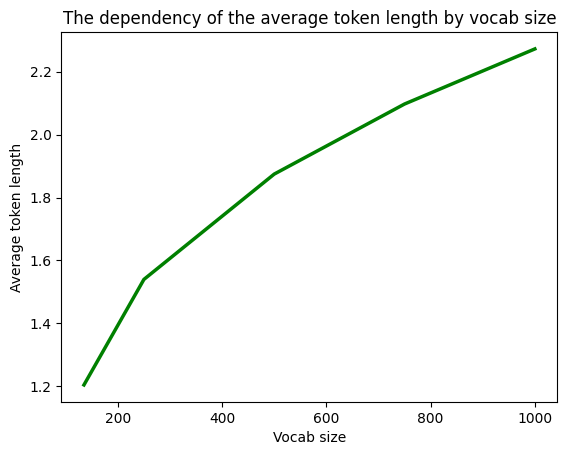

In [76]:
plot_token_len_vocab_size(vocab_sizes, average_lenghts)

### Answer:

As said in the previous answer, with increasing the vocabulary size, average token length grows and average number of tokens in the sentence decreases.Although, the graph is similar to those about tweets dataset, the absolute values have changed significantly.

For the case of average length in the datapoint the answer is simple - datapoints from Russian dataset are much longer (usually with several sentences) than tweets. The source for tweets dataset is social media with short texts, while the Russian dataset contains news text.

On the other hand, the average length of the token is a bit smaller for a Russian dataset. One may suppose that Russian alphabet contains more letters, so more combination exists. That's may be a reason to increase vocabulary size for a Russian texts with comparison to the English ones.

### Used resources:

Lecture and lab materials

Russian news dataset: www.kaggle.com/datasets/yutkin/corpus-of-russian-news-articles-from-lenta

https://huggingface.co/learn/nlp-course/chapter6/5

https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url

https://www.geeksforgeeks.org/unzipping-files-in-python/

https://www.w3schools.com/python/python_file_open.asp

https://www.digitalocean.com/community/tutorials/python-remove-spaces-from-string

https://www.digitalocean.com/community/tutorials/how-to-get-file-size-in-python